# Notebook Initialisation

In [1]:
from os import getcwd, pardir
from os.path import join, abspath

# ! pip install jupyter_nbextensions_configurator jupyter_contrib_nbextensions
# ! jupyter contrib nbextension install
# ! jupyter nbextension install --py fileupload 
# ! jupyter nbextension enable --py fileupload
# ! jupyter nbextension install --py widgetsnbextension 
# ! jupyter nbextension enable --py widgetsnbextension
# ! jupyter nbextensions_configurator enable
# ! jupyter nbextension enable codefolding/main
# ! jupyter nbextension enable toc2/main

! jupyter nbextension enable --py --sys-prefix widgetsnbextension
# init_notebook_mode(connected=True)

## Get Root Directory
rootDirectory = abspath(join(abspath(join(getcwd(), pardir)), pardir))

# `do not disturb` mode
import warnings                                  
warnings.filterwarnings('ignore')

## Create a button that hides cells
from IPython.display import HTML

HTML(
    '''
    <script>
    code_show=true; 
    function code_toggle() {
        if (code_show){
            $('div.input').show();
        } else {
            $('div.input').hide();
        }
        code_show = !code_show
    } 
    $( document ).ready(code_toggle);
    </script>
    
The raw code for this IPython notebook is by default hidden for easier reading.
To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>.''')

Enabling notebook extension jupyter-js-widgets/extension...
      - Validating: OK


# Data Load 

In [6]:
from test_utils import *

testsDir = join(rootDirectory, 'smartcitizen-iscape-tests')

def loadButton(b):
    frequency = frequency_text.value + frequency_drop.value
    readings_selected = loadTest(frequency)
    
    for key in readings_selected.keys():
        try:
            readings[key] = dict()
            readings[key] = readings_selected[key]
        except NameError:
            global readings
            readings = dict()
            readings[key] = readings_selected[key]
    

def clearButton(b):
    
    global readings
    clearTests()
    readings = {}

display(widgets.HTML('<hr><h4>Import Local Tests</h4>'))

tests = getTests(testsDir)
interact(selectTests,
         x = widgets.SelectMultiple(options=tests, 
                           selected_labels = selectedTests, 
                           layout=widgets.Layout(width='700px')))

loadB = widgets.Button(description='Load Local Tests')
loadB.on_click(loadButton)

frequency_text = widgets.Text(description = 'Frequency',
                              value = '1',
                              layout = widgets.Layout(width='300px'))
frequency_drop = widgets.Dropdown(options = ['H', 'Min', 'S'],
                                  value = 'Min',
                                  description = '',
                                  layout = widgets.Layout(width='100px'))

frequency_box = widgets.HBox([frequency_text, frequency_drop])

resetB = widgets.Button(description='Clear Tests')
resetB.on_click(clearButton)

buttonBox = widgets.HBox([loadB, resetB])
totalBox = widgets.VBox([frequency_box, buttonBox])
display(totalBox)

------------------------------------------------------


## Test Load

Loading test **2018-07_INT_TEMP_CALIB_CASE_NIGHT_25degC** performed from 2018-07-21 to 2017-07-21

Test performed with commit **0451aad9735d20c2a03f8e47b39796baba098e08**

<hr />
<p><strong>Comment:</strong> 
Temperature calibration test</p>
<p>Reading Interval: 2s
ON/OFF Sequence for mics: every 30min
Number of sequences: 5
ESP_ON time = 5s
ESP_OFF time = 30s</p>
<p>SCK in a case, SHT31 in open air.</p>

### KIT

#### CURRENT

Kit **CURRENT** located **Europe/Madrid**

Kit **CURRENT** has been loaded

#### TEMPERATURE

Kit **TEMPERATURE** located **Europe/Madrid**

Kit **TEMPERATURE** has been loaded

------------------------------------------------------
------------------------------------------------------


## Test Load

Loading test **2018-07_INT_TEMP_CALIB_30degC** performed from 2018-07-17 to 2017-07-17

Test performed with commit **0451aad9735d20c2a03f8e47b39796baba098e08**

<hr />
<p><strong>Comment:</strong> 
Temperature calibration test</p>
<p>Reading Interval: 2s
ON/OFF Sequence for mics: every 20min
Number of sequences: 5
ESP_ON time = 5s
ESP_OFF time = 30s</p>

### KIT

#### CURRENT

Kit **CURRENT** located **Europe/Madrid**

Kit **CURRENT** has been loaded

#### TEMPERATURE

Kit **TEMPERATURE** located **Europe/Madrid**

Kit **TEMPERATURE** has been loaded

------------------------------------------------------
------------------------------------------------------


## Test Load

Loading test **2018-07_INT_TEMP_CALIB_CASE_25degC** performed from 2018-07-21 to 2017-07-21

Test performed with commit **0451aad9735d20c2a03f8e47b39796baba098e08**

<hr />
<p><strong>Comment:</strong> 
Temperature calibration test</p>
<p>Reading Interval: 2s
ON/OFF Sequence for mics: every 30min
Number of sequences: 5
ESP_ON time = 5s
ESP_OFF time = 30s</p>
<p>SCK inside a case, SHT31 without a case</p>

### KIT

#### CURRENT

Kit **CURRENT** located **Europe/Madrid**

Kit **CURRENT** has been loaded

#### TEMPERATURE

Kit **TEMPERATURE** located **Europe/Madrid**

Kit **TEMPERATURE** has been loaded

------------------------------------------------------
------------------------------------------------------


## Test Load

Loading test **2018-07_INT_TEMP_CALIB_FRIDGE_5-10degC** performed from 2018-07-21 to 2017-07-21

Test performed with commit **0451aad9735d20c2a03f8e47b39796baba098e08**

<hr />
<p><strong>Comment:</strong> 
Temperature calibration test</p>
<p>Reading Interval: 2s
ON/OFF Sequence for mics: every 30min
Number of sequences: 5
ESP_ON time = 5s
ESP_OFF time = 30s</p>

### KIT

#### CURRENT

Kit **CURRENT** located **Europe/Madrid**

Kit **CURRENT** has been loaded

#### TEMPERATURE

Kit **TEMPERATURE** located **Europe/Madrid**

Kit **TEMPERATURE** has been loaded

------------------------------------------------------
------------------------------------------------------


## Test Load

Loading test **2018-07_INT_TEMP_CALIB_CASE_BOTH_25degC** performed from 2018-07-21 to 2017-07-21

Test performed with commit **0451aad9735d20c2a03f8e47b39796baba098e08**

<hr />
<p><strong>Comment:</strong> 
Temperature calibration test</p>
<p>Reading Interval: 2s
ON/OFF Sequence for mics: every 30min
Number of sequences: 5
ESP_ON time = 5s
ESP_OFF time = 30s</p>
<p>BOTH SHT31 and SCK in a case</p>

### KIT

#### CURRENT

Kit **CURRENT** located **Europe/Madrid**

Kit **CURRENT** has been loaded

#### TEMPERATURE

Kit **TEMPERATURE** located **Europe/Madrid**

Kit **TEMPERATURE** has been loaded

------------------------------------------------------


# Calculator

In [7]:
from formula_utils import *
import pandas as pd
from IPython.display import display, clear_output
import ipywidgets as widgets

def show_device_list(Source):
    _devices_select.options = [s for s in list(readings[_test.value]['devices'].keys())]
    #_min_date.value = readings[Source].index.min()._short_repr
    #_max_date.value = readings[Source].index.max()._short_repr

def commonChannels(selected):
    global commonChannelsList
    commonChannelsList = []
    if (len(selected) == 1):
        commonChannelsList = readings[_test.value]['devices'][selected[0]]['data'].columns
    if (len(selected) > 1):
        commonChannelsList = readings[_test.value]['devices'][selected[0]]['data'].columns
        for s in list(selected):
            commonChannelsList = list(set(commonChannelsList) & set(readings[_test.value]['devices'][s]['data'].columns))
    _Aterm.options = list(commonChannelsList)
    _Aterm.source = selected
    _Bterm.options = list(commonChannelsList)
    _Bterm.source = selected
    _Cterm.options = list(commonChannelsList)
    _Cterm.source = selected
    _Dterm.options = list(commonChannelsList)
    _Dterm.source = selected
    
def calculateFormula(b):
    clear_output()
    A = _Aterm.value
    B = _Bterm.value
    C = _Cterm.value
    D = _Dterm.value
    Name = _formulaName.value
    for s in list(selected):
        result = functionFormula(s,A,B,C,D,readings)
        readings[_test.value]['devices'][s]['data'][Name] = result
    print "Formula {} Added in test {}".format(Name, _test.value)
    
def functionFormula(s, Aname, Bname, Cname, Dname, _readings): 
    calcData = pd.DataFrame()
    mergeData = pd.merge(pd.merge(pd.merge(_readings[_test.value]['devices'][s]['data'].loc[:,(Aname,)],_readings[_test.value]['devices'][s]['data'].loc[:,(Bname,)],left_index=True, right_index=True), _readings[_test.value]['devices'][s]['data'].loc[:,(Cname,)], left_index=True, right_index=True),_readings[_test.value]['devices'][s]['data'].loc[:,(Dname,)],left_index=True, right_index=True)
    calcData[Aname] = mergeData.iloc[:,0] #A
    calcData[Bname] = mergeData.iloc[:,1] #B
    calcData[Cname] = mergeData.iloc[:,2] #C
    calcData[Dname] = mergeData.iloc[:,3] #D
    A = calcData[Aname]
    B = calcData[Bname]
    C = calcData[Cname]
    D = calcData[Dname]
    result = eval(_formula.value)
    return result
        
selected=tuple()
def selectedDevices(Source):
    global selected
    selected = list(Source)
    commonChannels(selected)

# Test dropdown
layout = widgets.Layout(width='400px')
_test = widgets.Dropdown(options=[k for k in readings.keys()], 
                        layout=layout,
                        description = 'Test')

_test_drop = widgets.interactive(show_device_list, 
                                Source=_test, 
                                layout=layout)

_Aterm = widgets.Dropdown(description = 'A', layout=layout)
_Bterm = widgets.Dropdown(description = 'B', layout=layout)
_Cterm = widgets.Dropdown(description = 'C', layout=layout)
_Dterm = widgets.Dropdown(description = 'D', layout=layout)

_devices_select = widgets.SelectMultiple(layout=widgets.Layout(width='700px'))
_devices_select_drop = interact(selectedDevices,
                                 Source = _devices_select)

_selectBox = widgets.VBox([_test_drop, _devices_select])

_formulaName = widgets.Text(description = 'Name: ')
_formula = widgets.Text(description = '=')
_ABtermsBox = widgets.HBox([_Aterm, _Bterm])
_CDtermsBox = widgets.HBox([_Cterm, _Dterm])
_termsBox = widgets.VBox([_selectBox, _ABtermsBox, _CDtermsBox])
_calculate = widgets.Button(description='Calculate')
_calculateBox = widgets.HBox([_formulaName,_formula, _calculate])
_calculate.on_click(calculateFormula)

display(widgets.HTML('<hr><h4>Select the Files for your formulas to apply</h4>'))
display(_termsBox)
display(widgets.HTML('<h4>Input your formula Below</h4>'))
display(_calculateBox)

## Vapour equilibrium: B is temperature in degC, assumed 1013mbar
# (1.0007 + 3.46*1e-6*1013)*6.1121*np.exp(17.502*B/(240.97+B))

Formula ON_OFF Added in test 2018-07_INT_TEMP_CALIB_FRIDGE_5-10degC


# Heating test

In [8]:
# To run in temperature tests with current that have 'ON_OFF' calculated with greater(current, 20)
from signal_utils import split_agnostisise

for reading in readings:
    print (reading)
    print readings[reading]['devices']['CURRENT']['data'].columns
    dataframeResult = split_agnostisise(readings, reading, 'ON_OFF_CURRENT')
    # dataframeResult = split_agnostisise(readings, reading, 'measuring')
    readings[reading]['devices']['analysis'] = dict()
    readings[reading]['devices']['analysis']['data'] = dict()
    readings[reading]['devices']['analysis']['data'] = dataframeResult

2018-07_INT_TEMP_CALIB_30degC
Index([u'Current', u'ON_OFF'], dtype='object')
['CURRENT', 'TEMPERATURE']
                           Current_CURRENT  ON_OFF_CURRENT  \
Time                                                         
2018-07-17 12:51:46+02:00             60.6             1.0   
2018-07-17 12:51:48+02:00             60.9             1.0   
2018-07-17 12:51:50+02:00              NaN             1.0   
2018-07-17 12:51:52+02:00             61.3             1.0   
2018-07-17 12:51:54+02:00             61.4             1.0   
2018-07-17 12:51:56+02:00             59.5             1.0   
2018-07-17 12:51:58+02:00             60.1             1.0   
2018-07-17 12:52:00+02:00             62.1             1.0   
2018-07-17 12:52:02+02:00             60.4             1.0   
2018-07-17 12:52:04+02:00             60.4             1.0   
2018-07-17 12:52:06+02:00             60.1             1.0   
2018-07-17 12:52:08+02:00             60.2             1.0   
2018-07-17 12:52:10+02:00   

2018-07_INT_TEMP_CALIB_CASE_BOTH_25degC
Index([u'Current', u'ON_OFF'], dtype='object')
['CURRENT', 'TEMPERATURE']
                           Current_CURRENT  ON_OFF_CURRENT  \
Time                                                         
2018-07-22 21:12:38+02:00             59.8             1.0   
2018-07-22 21:12:40+02:00             59.9             1.0   
2018-07-22 21:12:42+02:00             59.2             1.0   
2018-07-22 21:12:44+02:00             59.4             1.0   
2018-07-22 21:12:46+02:00             62.0             1.0   
2018-07-22 21:12:48+02:00             60.4             1.0   
2018-07-22 21:12:50+02:00             61.7             1.0   
2018-07-22 21:12:52+02:00             59.9             1.0   
2018-07-22 21:12:54+02:00             60.3             1.0   
2018-07-22 21:12:56+02:00             60.2             1.0   
2018-07-22 21:12:58+02:00             60.8             1.0   
2018-07-22 21:13:00+02:00             63.0             1.0   
2018-07-22 21:13:0

2018-07_INT_TEMP_CALIB_CASE_NIGHT_25degC
Index([u'Current', u'ON_OFF'], dtype='object')
['CURRENT', 'TEMPERATURE']
                           Current_CURRENT  ON_OFF_CURRENT  \
Time                                                         
2018-07-23 03:20:40+02:00             60.7             1.0   
2018-07-23 03:20:42+02:00             60.4             1.0   
2018-07-23 03:20:44+02:00             60.1             1.0   
2018-07-23 03:20:46+02:00             60.7             1.0   
2018-07-23 03:20:48+02:00             60.3             1.0   
2018-07-23 03:20:50+02:00             60.4             1.0   
2018-07-23 03:20:52+02:00             59.8             1.0   
2018-07-23 03:20:54+02:00             60.8             1.0   
2018-07-23 03:20:56+02:00             62.3             1.0   
2018-07-23 03:20:58+02:00             59.3             1.0   
2018-07-23 03:21:00+02:00             60.1             1.0   
2018-07-23 03:21:02+02:00             60.3             1.0   
2018-07-23 03:21:

2018-07_INT_TEMP_CALIB_CASE_25degC
Index([u'Current', u'ON_OFF'], dtype='object')
['CURRENT', 'TEMPERATURE']
                           Current_CURRENT  ON_OFF_CURRENT  \
Time                                                         
2018-07-22 14:16:40+02:00             60.8             1.0   
2018-07-22 14:16:42+02:00             60.0             1.0   
2018-07-22 14:16:44+02:00             60.2             1.0   
2018-07-22 14:16:46+02:00              NaN             1.0   
2018-07-22 14:16:48+02:00             61.4             1.0   
2018-07-22 14:16:50+02:00             61.5             1.0   
2018-07-22 14:16:52+02:00             60.5             1.0   
2018-07-22 14:16:54+02:00             60.6             1.0   
2018-07-22 14:16:56+02:00             61.3             1.0   
2018-07-22 14:16:58+02:00             60.8             1.0   
2018-07-22 14:17:00+02:00             60.4             1.0   
2018-07-22 14:17:02+02:00             60.2             1.0   
2018-07-22 14:17:04+02:

2018-07_INT_TEMP_CALIB_FRIDGE_5-10degC
Index([u'Current', u'ON_OFF'], dtype='object')
['CURRENT', 'TEMPERATURE']
                           Current_CURRENT  ON_OFF_CURRENT  \
Time                                                         
2018-07-21 17:06:20+02:00             60.5             1.0   
2018-07-21 17:06:22+02:00             61.4             1.0   
2018-07-21 17:06:24+02:00             61.4             1.0   
2018-07-21 17:06:26+02:00             60.5             1.0   
2018-07-21 17:06:28+02:00             59.9             1.0   
2018-07-21 17:06:30+02:00             60.1             1.0   
2018-07-21 17:06:32+02:00             60.7             1.0   
2018-07-21 17:06:34+02:00             61.2             1.0   
2018-07-21 17:06:36+02:00             60.0             1.0   
2018-07-21 17:06:38+02:00             60.3             1.0   
2018-07-21 17:06:40+02:00             63.0             1.0   
2018-07-21 17:06:42+02:00             59.8             1.0   
2018-07-21 17:06:44

## Plots

-------------------------------------
 Medias:

 analysis	Temperature_TEMPERATURE_OFF_-5.0	31.22
 analysis	External Temperature_TEMPERATURE_OFF_-5.0	30.07
 analysis	Temperature_TEMPERATURE_OFF_-4.0	31.24
 analysis	External Temperature_TEMPERATURE_OFF_-4.0	29.90
 analysis	External Temperature_TEMPERATURE_OFF_-3.0	29.86
 analysis	Temperature_TEMPERATURE_OFF_-3.0	30.73
 analysis	Temperature_TEMPERATURE_OFF_-2.0	31.08
 analysis	External Temperature_TEMPERATURE_OFF_-2.0	30.00
 analysis	Temperature_TEMPERATURE_OFF_-1.0	31.53
 analysis	External Temperature_TEMPERATURE_OFF_-1.0	30.35
-------------------------------------
-------------------------------------
 Std Deviation:

 analysis	Temperature_TEMPERATURE_OFF_-5.0	0.83
 analysis	External Temperature_TEMPERATURE_OFF_-5.0	0.04
 analysis	Temperature_TEMPERATURE_OFF_-4.0	0.85
 analysis	External Temperature_TEMPERATURE_OFF_-4.0	0.02
 analysis	External Temperature_TEMPERATURE_OFF_-3.0	0.07
 analysis	Temperature_TEMPERATURE_OFF_-3.0	0.62
 analysis

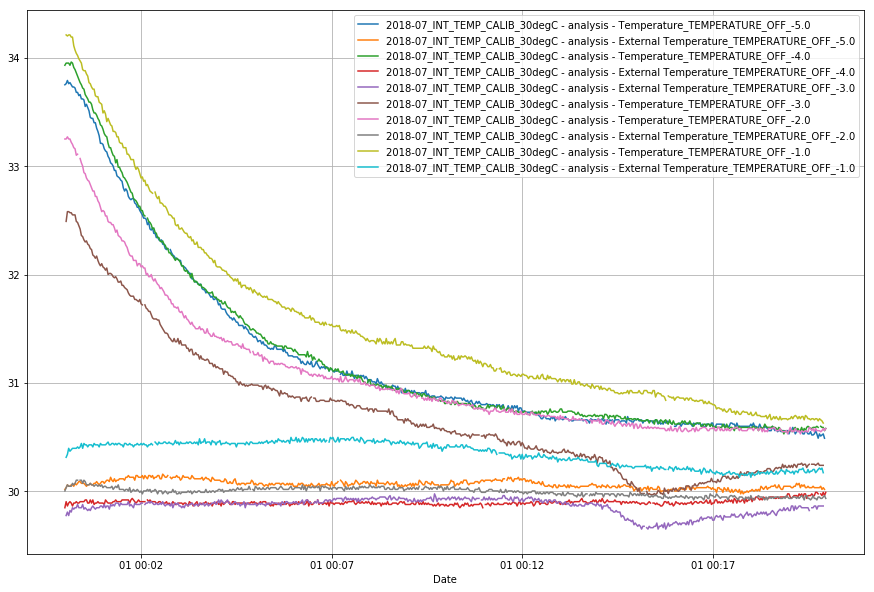

In [10]:
from IPython.display import display, Markdown, FileLink, FileLinks, clear_output, HTML
from IPython.core.display import HTML
from IPython.display import display, clear_output
import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed, interact_manual

# --
# Plotly
import plotly as ply
import plotly.graph_objs as go
from plotly.widgets import GraphWidget
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
from plotly.graph_objs import Scatter, Layout
import plotly.tools as tls

import matplotlib.pyplot as plot

init_notebook_mode(connected=True)

# Plot Y limits
setLimits = False
maxY = 15000
minY = 0

toshow = []
axisshow = []
# meanTable = []

def show_devices(Source):
    _device.options = [s for s in list(readings[Source]['devices'].keys())]
    _device.source = Source
    #_min_date.value = readings[Source].index.min()._short_repr
    #_max_date.value = readings[Source].index.max()._short_repr

def show_sensors(Source):
    _sensor_drop.options = [s for s in list(readings[_test.value]['devices'][Source]['data'].columns)]
    _sensor_drop.source = Source
    _min_date.value = readings[_test.value]['devices'][Source]['data'].index.min()._short_repr
    _max_date.value = readings[_test.value]['devices'][Source]['data'].index.max()._short_repr

def clear_all(b):
    clear_output()
    del toshow[:]
    del axisshow[:]

def add_sensor(b):
    clear_output()
    d = [_device.source, _sensor_drop.source, _sensor_drop.value]
    
    if d not in toshow: 
        toshow.append(d)
        axisshow.append(_axis_drop.value)
        
    plot_data = readings[toshow[0][0]]['devices'][toshow[0][1]]['data'].loc[:,(toshow[0][2],)]
    list_data_primary = []
    list_data_secondary = []
    list_data_terciary = []
    
    if b.slice_time:
        plot_data = plot_data[plot_data.index > _min_date.value]
        plot_data = plot_data[plot_data.index < _max_date.value]
    
    if len(toshow) > 1:
        for i in range(1, len(toshow)):
            plot_data = pd.merge(plot_data, readings[toshow[i][0]]['devices'][toshow[i][1]]['data'].loc[:,(toshow[i][2],)], left_index=True, right_index=True)
    # plot_data = plot_data.groupby(pd.Grouper(freq='10Min')).aggregate(np.mean)    

    print ('-------------------------------------')
    print (' Medias:\n')
    meanTable = []
    for d in toshow:
        myMean = ' ' + d[1]  + "\t" + d[2] + "\t"
        meanTable.append(myMean)   
    res = plot_data.mean()
    for i in range(len(meanTable)): print (meanTable[i] + '%.2f' % (res[i]))
    print ('-------------------------------------')
    
    print ('-------------------------------------')
    print (' Std Deviation:\n')
    stdTable = []
    for d in toshow:
        myStd = ' ' + d[1]  + "\t" + d[2] + "\t"
        stdTable.append(myStd)   
    std = plot_data.std()
    for i in range(len(stdTable)): print stdTable[i] + '%.2f' % (std[i])
    print ('-------------------------------------')

    # Change columns naming
    changed = []
    for i in range(len(plot_data.columns)):
        changed.append(toshow[i][0] + ' - '+ toshow[i][1] + ' - '+ plot_data.columns[i])
    plot_data.columns = changed
    
    subplot_rows = 0
    if len(toshow) > 0:
        for i in range(len(toshow)):
            if axisshow[i]=='1': 
                list_data_primary.append(str(changed[i]))
                subplot_rows = max(subplot_rows,1)
            if axisshow[i]=='2': 
                list_data_secondary.append(str(changed[i]))
                subplot_rows = max(subplot_rows,2)
            if axisshow[i]=='3': 
                list_data_terciary.append(str(changed[i]))
                subplot_rows = max(subplot_rows,3)
          
    
    if _matplotly.value == 'Plotly':
        fig1 = tls.make_subplots(rows=subplot_rows, cols=1, shared_xaxes=_synchroniseXaxis.value)
    
        #if len(list_data_primary)>0:
            #fig1 = plot_data.iplot(kind='scatter', y = list_data_primary, asFigure=True, layout = layout)
        #ply.offline.iplot(fig1)
        
        for i in range(len(list_data_primary)):
            fig1.append_trace({'x': plot_data.index, 'y': plot_data[list_data_primary[i]], 'type': 'scatter', 'name': list_data_primary[i]}, 1, 1)
    
        for i in range(len(list_data_secondary)):
            fig1.append_trace({'x': plot_data.index, 'y': plot_data[list_data_secondary[i]], 'type': 'scatter', 'name': list_data_secondary[i]}, 2, 1)
        
        for i in range(len(list_data_terciary)):
            fig1.append_trace({'x': plot_data.index, 'y': plot_data[list_data_terciary[i]], 'type': 'scatter', 'name': list_data_terciary[i]}, 3, 1)
    
        if setLimits: 
            fig1['layout'].update(height = 800,
                                legend=dict(x=-.1, y=1.2) ,
                               xaxis=dict(title='Time'))
                              
        else:
            fig1['layout'].update(height = 800,
                                  legend=dict(x=-.1, y=1.2) ,
                               xaxis=dict(title='Time'))
                               
        ply.offline.iplot(fig1)
        
    elif _matplotly.value == 'Matplotlib':
        
        fig, axes = plot.subplots(subplot_rows, 1, figsize=(15,10))
        # Four axes, returned as a 2-d array
        
        if subplot_rows == 1:
            for i in range(len(list_data_primary)):
                axes.plot(plot_data.index, plot_data[list_data_primary[i]], label =  list_data_primary[i])
                axes.legend(loc='best')

        else:
            for i in range(len(list_data_primary)):
                axes[0].plot(plot_data.index, plot_data[list_data_primary[i]], label =  list_data_primary[i])
                axes[0].legend(loc='best')
                axes[0].grid(visible = True)

            for i in range(len(list_data_secondary)):
                axes[1].plot(plot_data.index, plot_data[list_data_secondary[i]], label =  list_data_secondary[i])
                axes[1].legend(loc='best')
                axes[1].grid(visible = True)

            for i in range(len(list_data_terciary)):
                axes[2].plot(plot_data.index, plot_data[list_data_terciary[i]], label =  list_data_terciary[i])
                axes[2].legend(loc='best')
                axes[2].grid(visible = True)

        plot.xlabel('Date') 
        plot.grid(visible = True)
        plot.show()
        
    
def reset_time(b):
    _min_date.value = readings[b.src.value].index.min()._short_repr
    _max_date.value = readings[b.src.value].index.max()._short_repr

layout=widgets.Layout(width='330px')

# Test dropdown
_test = widgets.Dropdown(options=[k for k in readings.keys()], 
                        layout=layout,
                        description = 'Test')

_test_drop = widgets.interactive(show_devices, 
                                Source=_test, 
                                layout=layout)

# Device dropdown
_device = widgets.Dropdown(layout=layout,
                        description = 'Device')

_device_drop = widgets.interactive(show_sensors, 
                                Source=_device, 
                                layout=layout)

# Sensor dropdown
_sensor_drop = widgets.Dropdown(layout=layout,
                               description = 'Channel')

# Buttons
_b_add = widgets.Button(description='Add to Plot', layout=widgets.Layout(width='120px'))
_b_add.on_click(add_sensor)
_b_add.slice_time = False
_b_reset_all = widgets.Button(description='Clear all', layout=widgets.Layout(width='120px'))
_b_reset_all.on_click(clear_all)

# Axis dropdown
_axis_drop = widgets.Dropdown(
    options=['1', '2', '3'],
    value='1',
    description='Subplot:',
    disabled=False,
)

# Synchronise Checkbox
_synchroniseXaxis = widgets.Checkbox(value=False, 
                                     description='Synchronise X axis', 
                                     disabled=False, 
                                     layout=widgets.Layout(width='300px'))

_matplotly = widgets.RadioButtons(
    options=['Matplotlib', 'Plotly'], value='Matplotlib',
    description='Plot Type',
    disabled=False
)

# Date fields
_min_date = widgets.Text(description='Start date:', 
                         layout=widgets.Layout(width='330px'))
_max_date = widgets.Text(description='End date:', 
                         layout=widgets.Layout(width='330px'))

# Date buttons
_b_apply_time = _b_reset = widgets.Button(description='Apply dates', layout=widgets.Layout(width='100px'))
_b_apply_time.on_click(add_sensor)
_b_apply_time.slice_time = True
_b_reset_time = _b_reset = widgets.Button(description='Reset dates', layout=widgets.Layout(width='100px'))
_b_reset_time.on_click(reset_time)
#_b_reset_time.src = _kit


_device_box = widgets.HBox([_test_drop, _device_drop])
_sensor_box = widgets.HBox([_sensor_drop, _axis_drop, _synchroniseXaxis])
_plot_type_box = widgets.VBox([_matplotly])

_plot_box = widgets.HBox([_b_add , _b_reset_all])
_time_box = widgets.HBox([_min_date,_max_date, _b_reset_time, _b_apply_time])
_root_box = widgets.VBox([_matplotly, _time_box, _device_box, _sensor_box, _plot_box])
display(_root_box)